# Cluster Evaluation

2021.02.05

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#cluster evaluation metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
iris = load_iris()
feature_names =  ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters =3, init="k-means++", max_iter=300, random_state = 1).fit(iris_df)
iris_df['cluster'] = kmeans.labels_

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 개별 실루엣 값 구하기

In [12]:
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print("silhouette_samples 값, shape: ",score_samples.shape)
print("\n",score_samples)
iris_df['silhouette_coeff'] = score_samples

silhouette_samples 값, shape:  (150,)

 [0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294   0.80310303 0.83591262
 0.81056389 0.74615046 0.70259371 0.64377156 0.77568391 0.85101831
 0.70685782 0.82030124 0.78418399 0.82590584 0.79297218 0.7941134
 0.77503635 0.79865509 0.83346695 0.84201773 0.84364429 0.81784646
 0.81518962 0.79899235 0.76272528 0.72224615 0.82877171 0.83224831
 0.79415322 0.84188954 0.76856774 0.85033231 0.84941579 0.63900017
 0.78657771 0.80023815 0.74698726 0.80977534 0.81340268 0.81902059
 0.8182324  0.85209835 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26525405 0.34419223 0.57829491
 0.37478707 0.58710354 0.55107857 0.48216686 0.56310057 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.5069822  0.59466094 0.5607585  0.61972579 0.26087292
 0.54077013 0.41598629 0

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [15]:
average_score = silhouette_score(iris.data, iris_df['cluster'])
print("iris daatset's silhouettte analysis score is {0:.3f}".format(average_score))

iris daatset's silhouettte analysis score is 0.553


<AxesSubplot:>

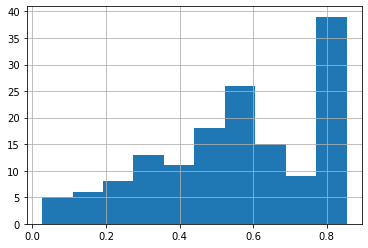

In [17]:
iris_df['silhouette_coeff'].hist()

In [18]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64